BoutInf (nBoutsx18):
- Columns 1 and 2: the start and end of the bout data in the continuous data variables
- Column 3: Number indicating the stimulus being shown during that bout
- Column 4: Original frame start number (allows actual timing of bout to be known, given 700 Hz frame rate)
- Columns 5:7 Pre-bout x, y position and theta in pixels and radians (???)
- Column 8: Eye Convergence during bout (2: converged; 1: not converged)
- Column 9: Change in eye convergence angle (degrees) during bout
- Column 10: Assigned eye convergence category (1=converge during  bout; 2=not converged ;  3=converged; 4=diverge during bout)
- Column 11: Bout category assigned using the scheme in Marques et al. 2018 (1=SCS; 2=LCS; 3=BS; 4=O-bend; 5=J-turn; 6=SLC; 7=S1; 8=RT; 9=S2; 10=LLC; 11=AS; 12=SAT; 13=HAT)

In [39]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
from childes_mi.utils.paths import DATA_DIR, ensure_dir, ZEBRAFISH_DIR
import urllib.request

In [41]:
from tqdm.autonotebook import tqdm
import h5py
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import pandas as pd

In [42]:
mat_files = list(ZEBRAFISH_DIR.glob('**/*.mat'))

In [43]:
mat_files[0]

PosixPath('/mnt/cube/tsainbur/Projects/github_repos/childes_mi_project/data/raw/ZEBRAFISH_Data_Dir/3minLightDark/3minLightDark2/3minLightDark200004.mat')

In [44]:
len(mat_files)

184

In [45]:
bout_df = pd.DataFrame(columns = ['mat_loc', 'bouts', 'bout_lens', 'bout_len_seconds'])
for mfi, mat_file in enumerate(tqdm(mat_files)):
    ds = scipy.io.loadmat(mat_file.as_posix())
    BoutInf = ds['boutStructure'][0][0][0]
    bout_category = BoutInf[:,-1].astype('int')
    bout_len_seconds = ((BoutInf[:,3][-1] - BoutInf[:,3][0])) / framerate
    bout_df.loc[len(bout_df)] = [mat_file.as_posix(), bout_category, len(bout_category), bout_len_seconds]

### Element length in seconds

In [51]:
seconds_per_bout = list(bout_df.bout_len_seconds.values / bout_df.bout_lens.values)
seconds_per_bout[:3]

[0.9033980651083963, 0.832541845075905, 1.5650579796772266]

(array([47., 61., 34., 26.,  6.,  3.,  1.,  0.,  3.,  3.]),
 array([0.52036282, 0.86831461, 1.21626641, 1.5642182 , 1.91216999,
        2.26012178, 2.60807357, 2.95602537, 3.30397716, 3.65192895,
        3.99988074]),
 <a list of 10 Patch objects>)

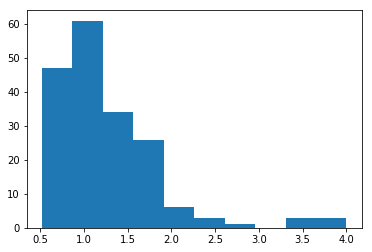

In [52]:
plt.hist(seconds_per_bout)

In [54]:
# minutes
(np.mean(seconds_per_bout)*1000)/60

21.350781340732443